# Clustering and KNN

This lab will investigate how clustering can be used to find similar groups of registered users in the Boston bike-sharing program, Hubway. Users of Hubway can check out a bicycle from one of 140 stations located throughout the Boston area, and return the bike to a different station. Users pay a membership fee, which includes unlimited trips up to 30 minutes in duration at no additional cost. Trips longer than 30 minutes cost additional "overtime" fees.

At the end of the lab you'll be able to:
- use Clustering models with different hyperparameters
- interpret the result of different models


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import libraries and data


In [ ]:
#Importing the required packages
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

The dataset contains data from trips taken by registered users of Hubway from June 2012 through September 2012. The dataset contains 9 variables. Our goal is to cluster trips and try to find interesting insights about the types of trips customers of Hubway tend to take. Please load the `HubwayTrip.csv`file.

In [ ]:
trip = pd.read_csv('/content/drive/MyDrive/ML/Class 1 - EDA/Datasets/HubwayTrips.csv')
trip.head(10)

,Duration,Morning,Afternoon,Evening,Night,Weekday,Weekend,Male,Age
0,743,0,0,1,0,1,0,0,17
1,872,0,1,0,0,1,0,0,17
2,514,0,1,0,0,1,0,0,17
3,1337,0,1,0,0,1,0,0,17
4,493,1,0,0,0,0,1,0,17
5,620,0,1,0,0,0,1,0,17
6,1112,0,1,0,0,1,0,0,17
7,259,0,0,1,0,0,1,0,17
8,445,0,0,1,0,0,1,0,17
9,1155,0,0,0,1,1,0,0,17


The table below contains the data dictionary.

|Feature    |Definition                                                                  |
|:---------:|:---------------------------------------------------------------------------|
|Duration  |The time of the trip in seconds                                              |
|Morning   |Whether or not the trip started in the morning, between the hours of 6am-12pm                     (1 if yes, and 0 if no)                                                      |    
|Afternoon |Whether or not the trip started in the morning, between the hours of 12pm-6pm                     (1 if yes, and 0 if no)                                                      |
|Evening   |Whether or not the trip started in the morning, between the hours of 6pm-12am                     (1 if yes, and 0 if no)                                                      |      
|Night     |Whether or not the trip started in the morning, between the hours of 12am-6am                     (1 if yes, and 0 if no)                                                      |
|Weekday   |Whether or not the trip started on Monday, Tuesday, Wednesday, Thursday, or Friday               (1 if yes, and 0 if no)                                                      |
|Weekend   |Whether or not the trip started on Saturday or Sunday (1 if yes, and 0 if no)|
|Male      |Whether or not the user was male (1 if yes, and 0 if no)                     |      
|Age       |The age of the user, in years                                                |


Review the dataset by using `info` and `describe`

In [ ]:
print(trip.info())
trip.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Duration   9999 non-null   int64
 1   Morning    9999 non-null   int64
 2   Afternoon  9999 non-null   int64
 3   Evening    9999 non-null   int64
 4   Night      9999 non-null   int64
 5   Weekday    9999 non-null   int64
 6   Weekend    9999 non-null   int64
 7   Male       9999 non-null   int64
 8   Age        9999 non-null   int64
dtypes: int64(9)
memory usage: 703.2 KB
None


,Duration,Morning,Afternoon,Evening,Night,Weekday,Weekend,Male,Age
count,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.0,9999.000000
mean,802.813881,0.280628,0.384938,0.305431,0.029003,0.772577,0.227423,0.0,23.044104
std,2319.204320,0.449329,0.486605,0.460613,0.167823,0.419189,0.419189,0.0,1.742459
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,17.000000
25%,403.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,22.000000
50%,603.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,24.000000
75%,912.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.0,24.000000
max,94487.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,25.000000


> Split the dataset into X(features) and y(target variable)

In [ ]:
#Write the code here
#--------------------------------------
y = trip['Duration']
X = trip.drop(['Duration'], axis = 1)

#--------------------------------------
print(X, y)


      Morning  Afternoon  Evening  Night  Weekday  Weekend  Male  Age
0           0          0        1      0        1        0     0   17
1           0          1        0      0        1        0     0   17
2           0          1        0      0        1        0     0   17
3           0          1        0      0        1        0     0   17
4           1          0        0      0        0        1     0   17
...       ...        ...      ...    ...      ...      ...   ...  ...
9994        0          1        0      0        0        1     0   25
9995        0          1        0      0        0        1     0   25
9996        0          0        1      0        0        1     0   25
9997        0          0        1      0        0        1     0   25
9998        0          0        0      1        0        1     0   25

[9999 rows x 8 columns] 0        743
1        872
2        514
3       1337
4        493
        ... 
9994    1541
9995    1828
9996     563
9997     493
9998 

> When clustering data, it is often important to normalize the variables, so that they will be all on the same scale. Normalize all of the variables in the dataset by using  [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

In [ ]:
#Write the code here
#------------------------------------------------------
sc = MinMaxScaler()
X = sc.fit_transform(X)
X = pd.DataFrame(X)
#-----------------------------------------------------
print(X)


        0    1    2    3    4    5    6    7
0     0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0
1     0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0
2     0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0
3     0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0
4     1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
...   ...  ...  ...  ...  ...  ...  ...  ...
9994  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0
9995  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0
9996  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0
9997  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0
9998  0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0

[9999 rows x 8 columns]


## Part I: Agglomerative Clustering
This algorithm begins by initalizing every point to its own cluster. Then in each iteration, using a linkage rule (e.g., _complete_) and distance metric (e.g., _euclidean_),  the clusters with the smallest distance are merged together. The iterations continue until there is only one cluster. The sequence of linkages can be calculated using ```linkage``` from ```scipy``` as shown in the following code block.

In [ ]:
from scipy.cluster.hierarchy import linkage

completeTrip = linkage(X, method='complete', metric = 'euclidean')

print('The first row looks like {}'.format(completeTrip[0]))
print('The last row looks like {}'.format(completeTrip[-1]))

The first row looks like [ 0. 12.  0.  2.]
The last row looks like [1.99920000e+04 1.99950000e+04 2.23606798e+00 9.99900000e+03]


>How many steps does the clustering algorithm take? You can use `len` function.

In [ ]:
#How many steps does the clustering algorithm take?

#Write the code here
#-------------------------------------
steps = len(completeTrip)
#-------------------------------------
print('The algorthim takes {} steps'.format(steps))

The algorthim takes 9998 steps


You can visualize the linkage matrix using a `dendrogram`. The dendrogram for clustering with `Euclidean` distance and the `Complete` rule is plotted below.

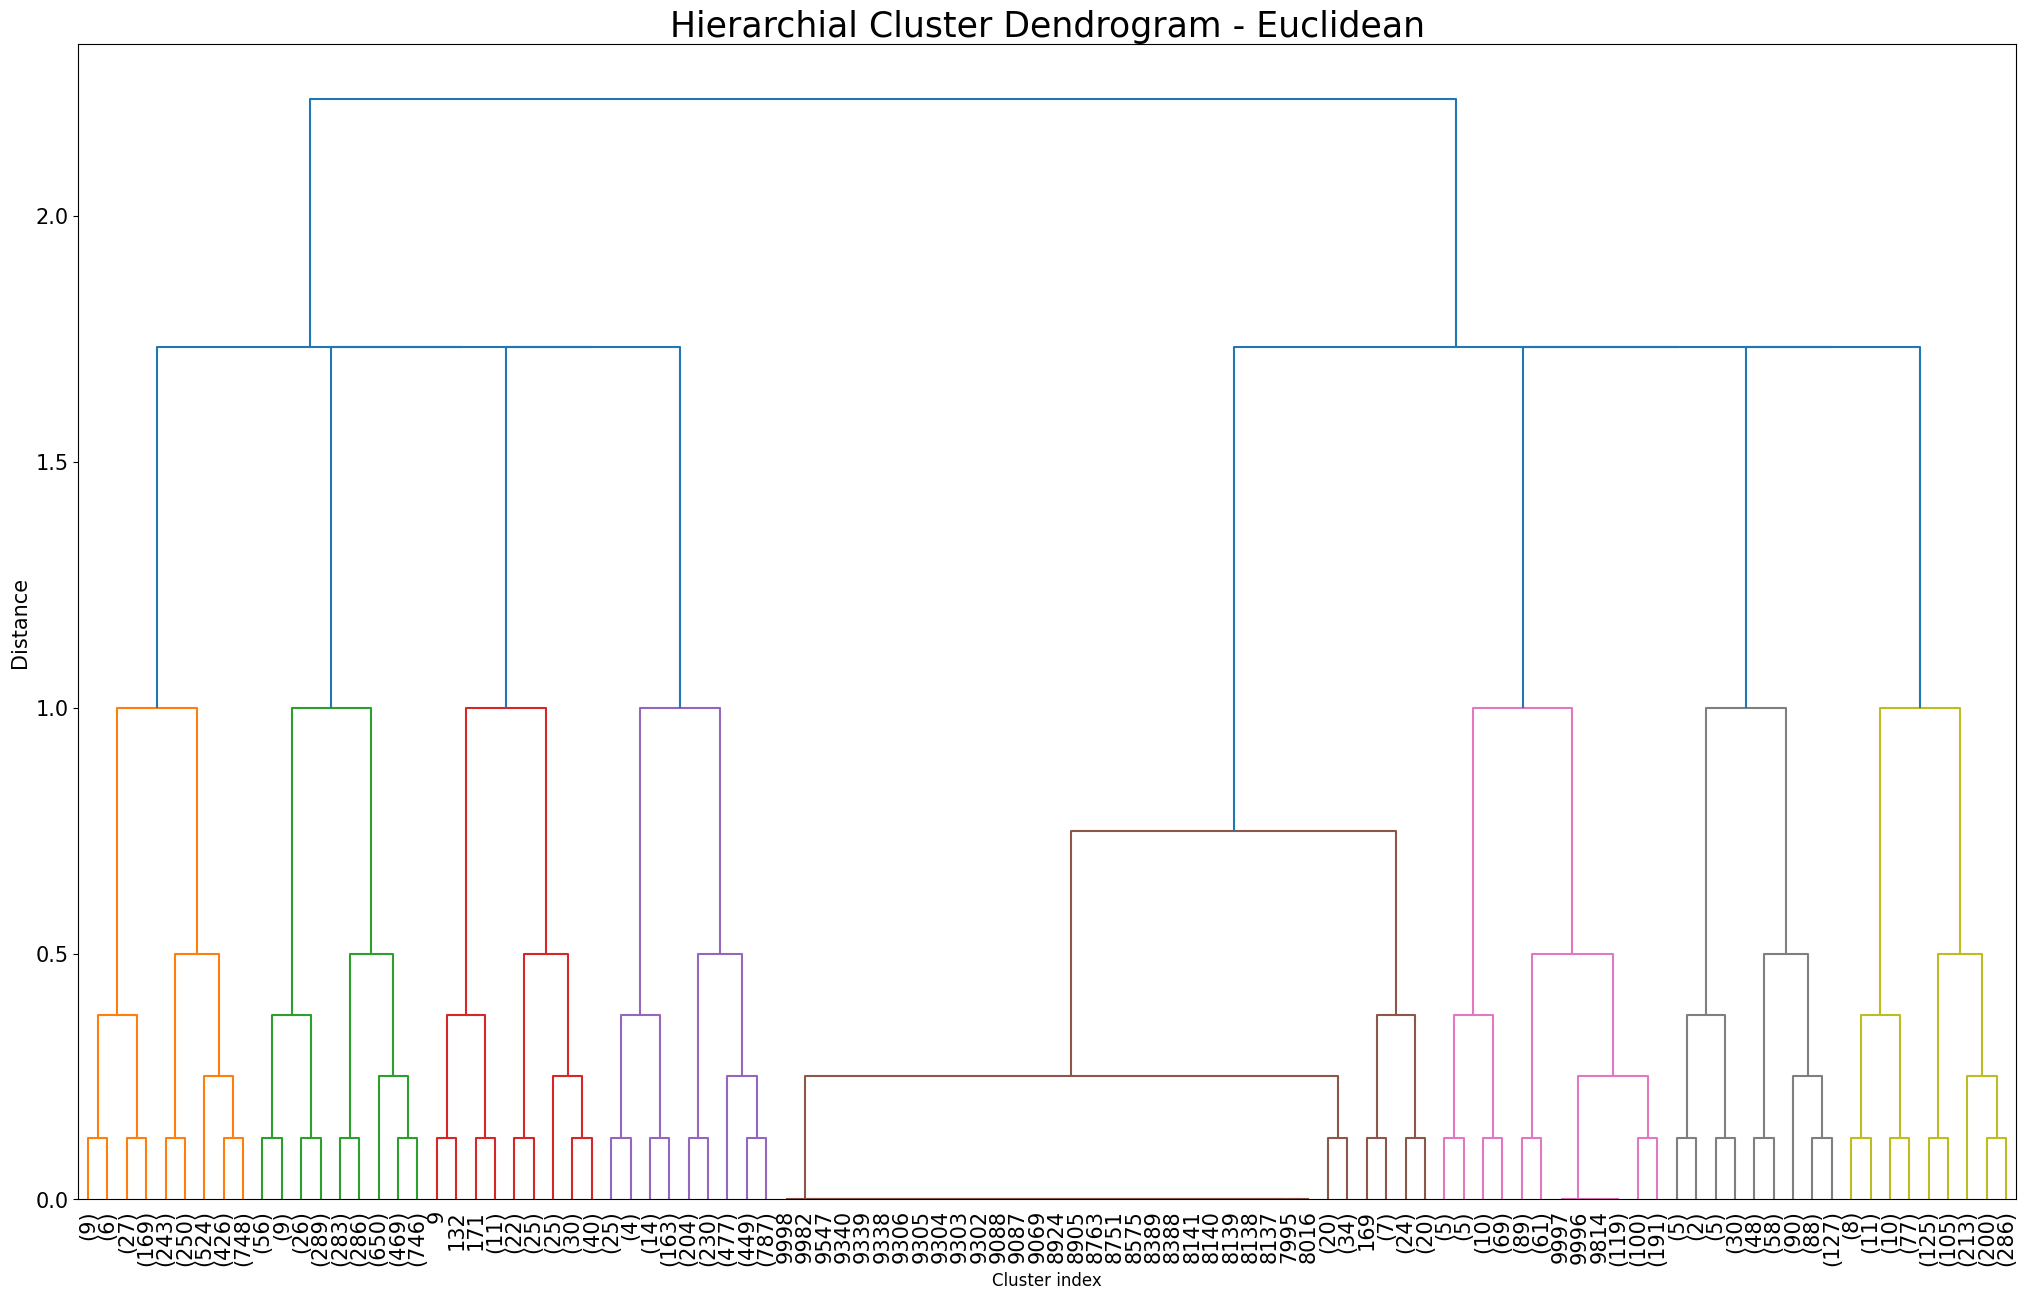

In [ ]:
from scipy.cluster.hierarchy import dendrogram

# Initialize figure settings and labels
plt.figure(figsize=(25, 15))
plt.title('Hierarchial Cluster Dendrogram - Euclidean',fontsize = 25)
plt.xlabel('Cluster index',fontsize = 12)
plt.ylabel('Distance',fontsize = 15)
plt.yticks(fontsize = 15)

# Plot dendrogram with following parameters
# p = 100 and trucate_mode = 'lastp' work together to display
# only the final 100 nodes of the dendrogram
dendrogram(completeTrip,
            truncate_mode= 'lastp', # displays the final p linked clusters (i.e., nodes in graph)
            p = 100, # Number of clusters
            leaf_rotation=90, # Rotates cluster numbers on x-axis
            leaf_font_size=15,
            show_leaf_counts = True) # Shows number of samples contained in each cluster

plt.show()

> Plot the dendrogram using Manhattan distance and the Average rule.
>
> _Hint_ = You can see different types of metrics [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html), and different types of linkage methods [here](https://stats.stackexchange.com/questions/195446/choosing-the-right-linkage-method-for-hierarchical-clustering)

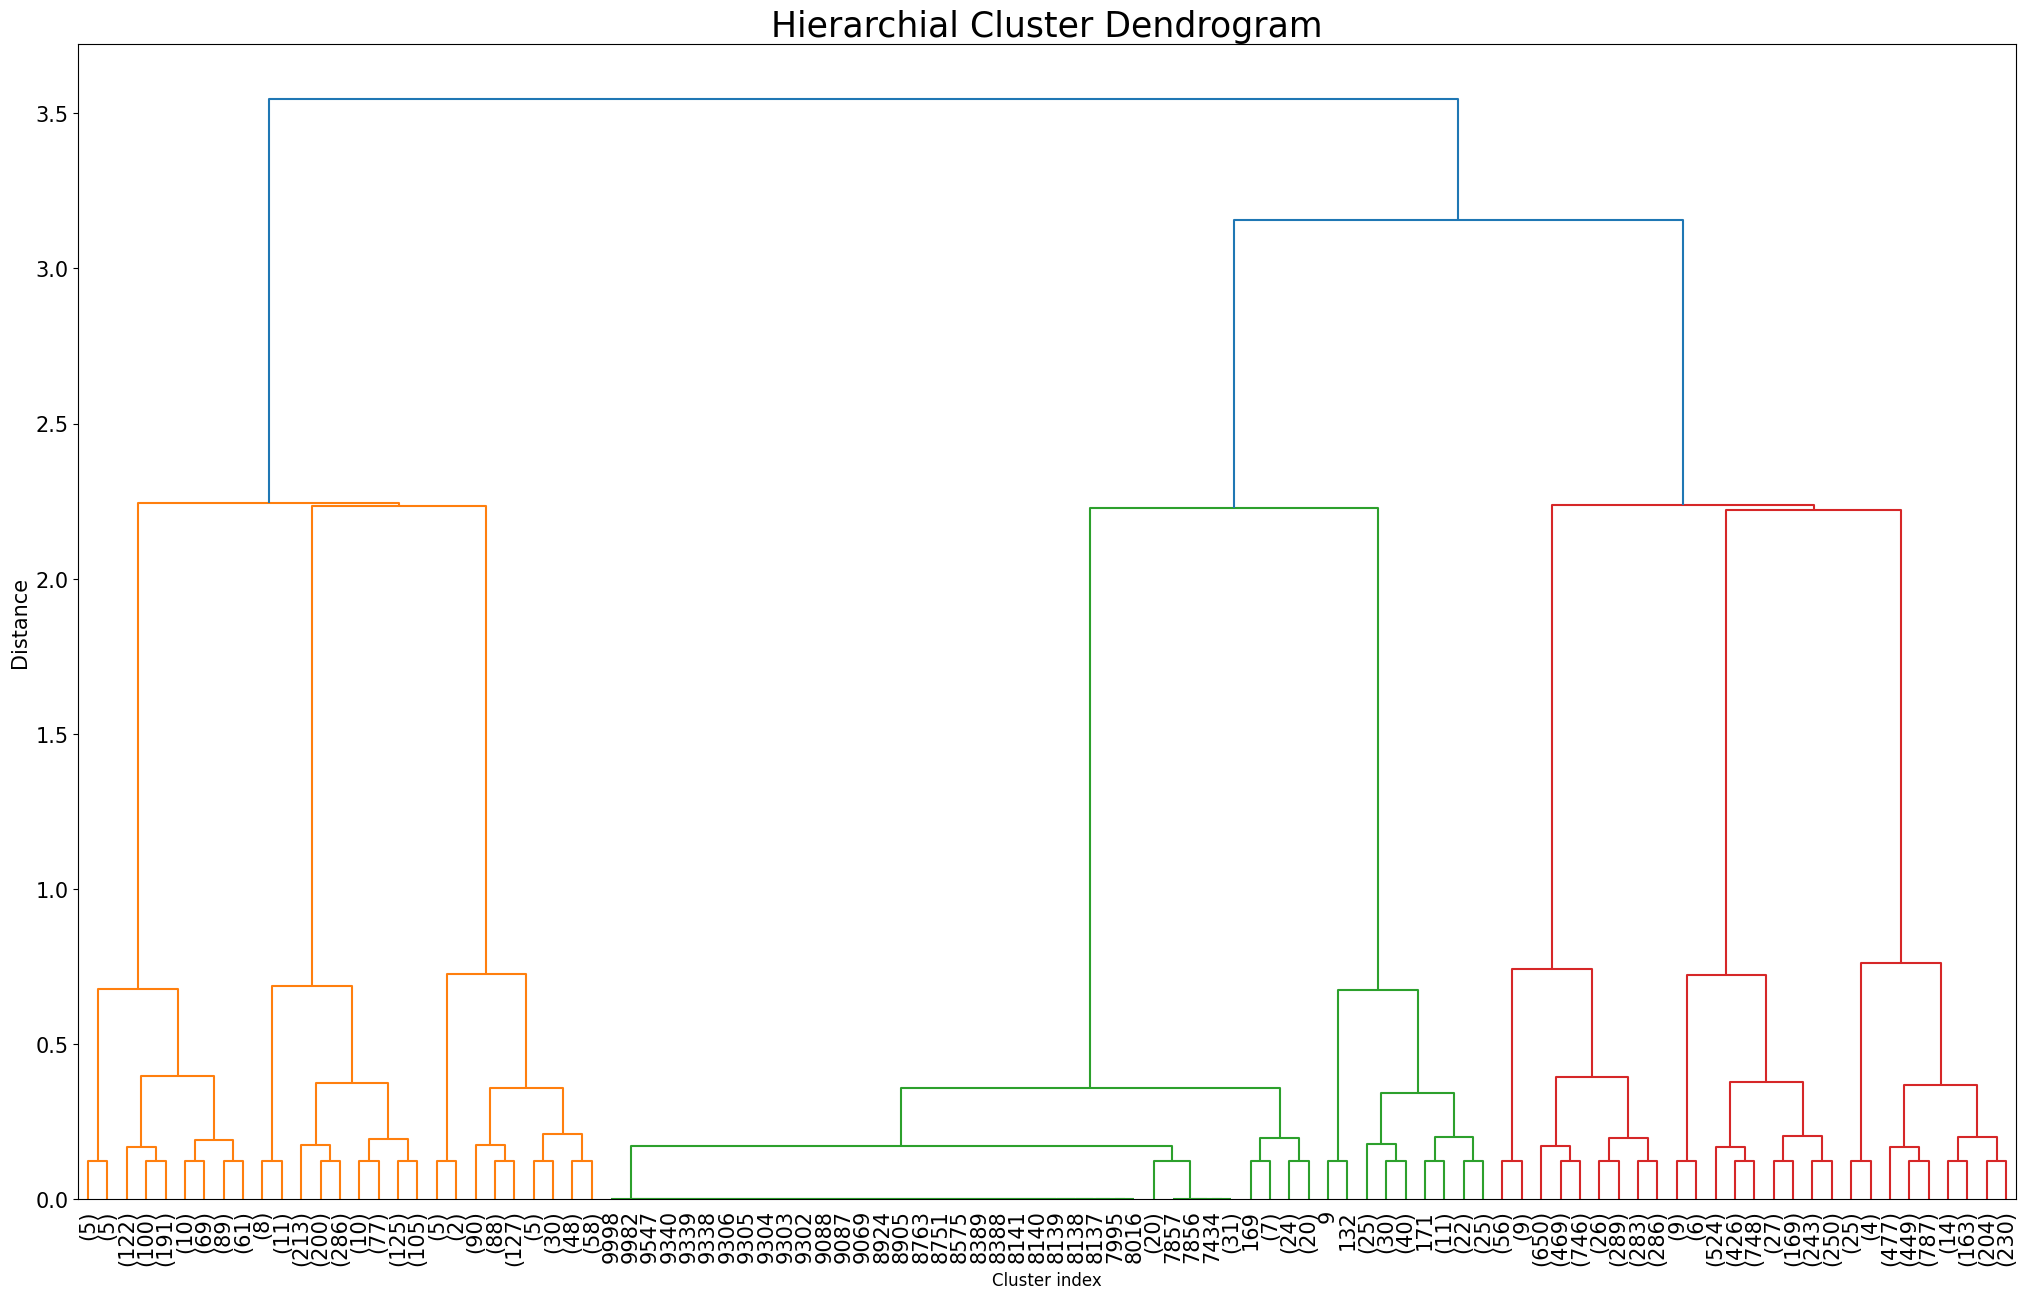

In [ ]:
#Plot the dendrogram using Manhattan distance and the Average rule.
#Call the linkage matrix avgTrip

# Write the code here
# ----------------------------------------------------
avgTrip = linkage(X, method='average', metric = 'cityblock')
# ----------------------------------------------------
plt.figure(figsize=(25, 15))
plt.title('Hierarchial Cluster Dendrogram',fontsize = 25)
plt.xlabel('Cluster index',fontsize = 12)
plt.ylabel('Distance',fontsize = 15)
plt.yticks(fontsize = 15)

dendrogram(avgTrip,
            truncate_mode= 'lastp', # displays the final p linked clusters (i.e., nodes in graph)
            p = 100, # Number of clusters
            leaf_rotation=90, # Rotates cluster numbers on x-axis
            leaf_font_size=15)
# ----------------------------------------------------
plt.show()

> Of these two methods, which do you think does a better job of clustering? Why?

The functions in `scipy.cluster.hierarchy` are great for visualizing and analyzing hierarchical clustering algorthms, however, they are difficult to use in prediction-based frameworks. As a result, we will use the `AgglomerativeClustering` from `sklearn.cluster` for the remainder of the lab.

Of interest to us, the [AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) function takes the arguments affinity (distance metric), linkage (linkage method), and n_clusters (number of clusters). In general, we are interested in identifying a cutoff point for the number of clusters in the clustering algorithm.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


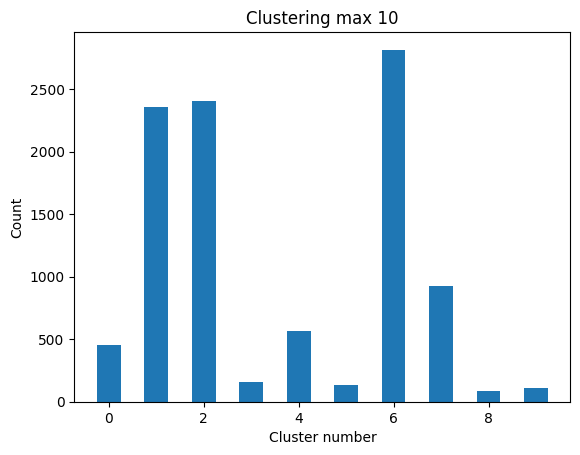

In [ ]:
# Import the new clustering funcTion
from sklearn.cluster import AgglomerativeClustering

# Define the clustering model
hClusMdl = AgglomerativeClustering(n_clusters=10, linkage='complete', affinity = 'euclidean')
hClusMdl.fit(X)

# Get cluster lables
clA = hClusMdl.labels_

# Make a histogram of number of points in each cluster (labeled 0 -> 9)
binNums = list(set(clA))
# Add on range to cover last value
binNums.append(np.max(binNums)+1)

#Plot histogram
plt.hist(clA,bins=binNums,rwidth=0.5,align='left')
plt.title('Clustering max 10')
plt.ylabel('Count')
plt.xlabel('Cluster number')

plt.show()

There is no 'golden rule' on how best to cluster. Clustering depends on the application or what you do with the clusters afterwards. In general, you should consider at least the following questions while clustering:

 - How many clusters can you permit? How many clusters are too many, and how many are too few?
 - How many points do you want in all of your clusters?
 - How close to each other can separate clusters be?


# Part II: k-means Clustering
$k$-means clustering is the fast and dirty approach to clustering. You only need to consider a distance measure and fix the number of clusters into which you want to divide the data. Once again, you may want to try and play with different cluster numbers. Use the [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) function to divide the data into 10 separate clusters. Note that you must use the movies array for this task.

In [ ]:
from sklearn.cluster import KMeans

# Define and fit the model
# Write the code here
#-----------------------------------------------------------------------------------------
# set "n_init = 1"
mdlKMeans = KMeans(n_clusters=10, n_init=1, random_state = 5)  # Set n_clusters to 10, n_init to 1
mdlKMeans.fit(X)

#------------------------------------------------------------------------------------------

# Get cluster assignments for each datapoint
clK = mdlKMeans.labels_

# Get the centroid of each cluster
Centroids = mdlKMeans.cluster_centers_

$k$-means clustering tries to identify the optimal placement of the $k$ cluster centroids and bins the data accordingly. The final centroids are saved in the rows of `Centroids`. Complete the following activities:

Let's identify the cluster that primarily stores `Weekend` trips. Compare the number of Weekend trips assigned to that cluster with your neighbours. What do you notice?

In [ ]:
totalDocs = X.iloc[:, 5].sum()

clusterSet = set(clK)
mostDocs = 0
for c in clusterSet:
    docCount = X.iloc[:,5][c==clK].sum()
    if docCount > mostDocs:
        mostDocs = docCount
        docCluster = c

print('At most {} of the {} weekend trips were assigned to a single cluster.'.format(mostDocs,totalDocs))


At most 1035.0 of the 2274.0 weekend trips were assigned to a single cluster.


> Change the n_init value to run the algorithm multiple times. Identify the Weekend cluster and compare your results with your neighbours.

In [ ]:

totalDocs = X.iloc[:, 5].sum()

# ------------------------
#Change the n_init value

mdlKMeans.n_init = 1000

#-------------------------
mdlKMeans.fit(X)
clK = mdlKMeans.labels_
Centroids = mdlKMeans.cluster_centers_

clusterSet = set(clK)
mostDocs = 0
for i in clusterSet:
    docCount = X.iloc[:, 5][i==clK].sum()
    if docCount > mostDocs:
        mostDocs = docCount
        docCluster = i
# -------------------
print('At most {} of the {} weekend trips were assigned to a single cluster.'.format(mostDocs,totalDocs))


At most 1035.0 of the 2274.0 weekend trips were assigned to a single cluster.


In the examples above we arbitrarily set the number of clusters $k$ to 10, however, there are tricks to choosing the right $k$. One method is to plot some measure we are interested in minimizing (e.g., average distance of points to their assigned centroid) against the number of clusters in the KNN algorithm. This graph is called an `elbow plot`, and we can use it to identify the point at which adding more clusters becomes less useful. Complete the following excercise:

> Using `X` you can complete the code below to print an elbow plot.

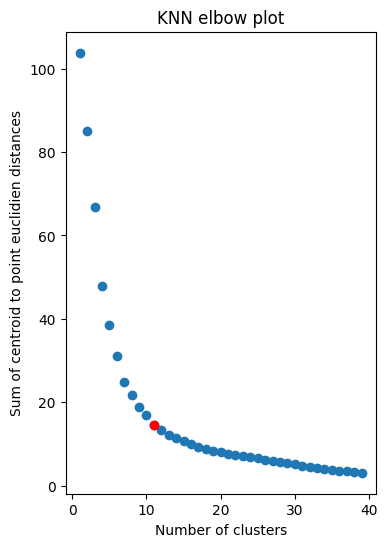

In [ ]:
# Choose range for cluster sizes to plot
clusterSizes = list(range(1,40))
avgDistances = []

for k in clusterSizes:
    # make and fit a model with k clusters
    # -------------------
    mdlKMeans.n_clusters = k
    mdlKMeans.fit(X)
    # -------------------

    # Get distances for each point that is fit to the model
    distsForK = mdlKMeans.transform(X)

    # Get y values (avg distance) for the plot
    # -------------------
    point2ClusterDistance = np.min(distsForK,axis = 1)
    avgDistances.extend([np.sqrt((point2ClusterDistance**2).sum())])
    # -------------------

plt.figure(figsize=(4,6))
plt.scatter(clusterSizes,avgDistances)
plt.ylabel('Sum of centroid to point euclidien distances')
plt.xlabel('Number of clusters')
plt.title('KNN elbow plot')

#You can modify the code below according to elbow plot
plt.scatter(clusterSizes[10] , avgDistances[10], color = 'red')
#plt.savefig('img/elbowPlot.png')
plt.show()

# Part III: Predicting Duration Using Clusters
> Let's predict the duration of the trip by using `KNN`. For this implementation, the dataset should be split into `train` and `test` sets. You can use [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function or you can have it manually. Please fill in the missing parts. While fitting the model, you can use a proper number of _`k`_  which is obtained while implementing `KMEans` as a `n_neighbor` parameter.


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

#Write the code here
#-------------------------------------------------------------------------------

#splitting data into train and test---------------------------------------------
XTrain, XTest,yTrain,yTest = train_test_split(X, y,test_size=0.2, random_state=0)

#create and fit the model-------------------------------------------------------
knn = KNeighborsRegressor(n_neighbors=10, weights="uniform", algorithm="auto", leaf_size=30, p=2, metric="minkowski")
knn.fit(XTrain, yTrain)

#predict via the model ---------------------------------------------------------
predict = knn.predict(XTest)

#-------------------------------------------------------------------------------


If we apply [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html), we have the scores for different cross validation sets. Here you can see different metrics for `knn` model

In [ ]:
from sklearn.model_selection import cross_val_score

print (np.median(predict))
print("Test set predictions:\n{}".format(predict))
print("Test set R^2: {:.4f}".format(knn.score(XTest, yTest)))
print("Cross validation score:", cross_val_score(knn, XTrain, yTrain, cv=3 ))


630.2
Test set predictions:
[760.9 783.5 746.1 ... 809.6 625.1 624.2]
Test set R^2: -0.0560
Cross validation score: [-0.01551938 -0.09302276 -0.32459166]


> Suppose you want to do a new prediction with an unseen array for each feature. What will you be having for a newly predicted "duration" value?

In [ ]:
#  Write the code here
#--------------------------------------------------------
example_measures = np.array([[0, 0, 1, 1, 0, 1, 1, 25]])

new_prediction = knn.predict(example_measures)
#--------------------------------------------------------

print("New value:", new_prediction)

New value: [693.6]


> The code below is to see the reactions of different _`k`_ number and to have RMSE values for each of them. Please fill in the missing parts.

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error

rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

#Write the code here
#fit the model and predict -----------------------------------------------------
    model.fit(XTrain, yTrain)  #fit the model
    pred=model.predict(XTest)


#-------------------------------------------------------------------------------
    error = sqrt(mean_squared_error(yTest,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)



RMSE value for k=  1 is: 3433.0821525999054
RMSE value for k=  2 is: 3407.511524191811
RMSE value for k=  3 is: 4216.935420737039
RMSE value for k=  4 is: 3866.103748308819
RMSE value for k=  5 is: 3695.5053785267314
RMSE value for k=  6 is: 3599.010423763887
RMSE value for k=  7 is: 3533.0815805795673
RMSE value for k=  8 is: 3497.398440667184
RMSE value for k=  9 is: 3471.3511598760556
RMSE value for k=  10 is: 3451.9777353974923
RMSE value for k=  11 is: 3436.58059593537
RMSE value for k=  12 is: 3427.918483147993
RMSE value for k=  13 is: 3417.950754672148
RMSE value for k=  14 is: 3411.749219639646
RMSE value for k=  15 is: 3405.1014463948063
RMSE value for k=  16 is: 3399.358753623673
RMSE value for k=  17 is: 3396.075315912396
RMSE value for k=  18 is: 3393.4707553123976
RMSE value for k=  19 is: 3389.3829592038246
RMSE value for k=  20 is: 3387.067795383456


> Plot the RMSE values against _`k`_ values.

Text(0.5, 0, 'Number of k')

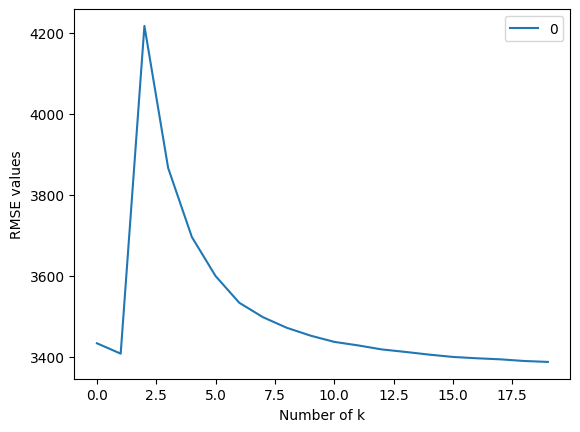

In [ ]:

#Write the code here------------------------------------------------------------
curve = pd.DataFrame(rmse_val) #elbow curve
curve.plot()

plt.ylabel('RMSE values')
plt.xlabel('Number of k')


#------------------------------------------------------------------------------

> As you know, different parameters give different results. Set different `n_neigbors` parameters to see different results for each. To have the best parameter for `KNeighborsRegressor()`, `GridSearchCV` is applied. You can find the detailed information [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

In [ ]:
from sklearn.model_selection import GridSearchCV

#Select your n_neighbors parameters------------------------
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

#---------------------------------------------------------

knn1 = KNeighborsRegressor()
model1 = GridSearchCV(knn1, params, cv=5)
model1.fit(XTrain,yTrain)

print(model1.best_params_)
print(model1.best_score_)
print(pd.DataFrame(model1.cv_results_))

{'n_neighbors': 9}
-0.3074890352202907
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.008686      0.000680         0.042640        0.001508   
1       0.008302      0.000114         0.042161        0.001016   
2       0.009426      0.002092         0.042709        0.003069   
3       0.008744      0.001018         0.044304        0.003220   
4       0.008205      0.000046         0.043948        0.002516   
5       0.008453      0.000189         0.043650        0.001540   
6       0.008405      0.000293         0.045004        0.006026   
7       0.008266      0.000124         0.043506        0.001950   

  param_n_neighbors              params  split0_test_score  split1_test_score  \
0                 2  {'n_neighbors': 2}          -7.263319          -3.186938   
1                 3  {'n_neighbors': 3}          -3.270365          -1.420872   
2                 4  {'n_neighbors': 4}          -1.856980          -0.794053   
3                 5  {'n_neighbor